###DATACOLLECTION

Seeting up the google drive to connect with the dataset

In [1]:
#Setting google drive as a directory for dataset
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Defining the dataset file.

In [7]:
dir_path = "gdrive/My Drive/FE/Project/Dataset"

Check what all the files include in the directory.

In [8]:
import os
for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

gdrive/My Drive/FE/Project/Dataset/sign_mnist_train.csv
gdrive/My Drive/FE/Project/Dataset/amer_sign3.png
gdrive/My Drive/FE/Project/Dataset/amer_sign2.png
gdrive/My Drive/FE/Project/Dataset/american_sign_language.PNG
gdrive/My Drive/FE/Project/Dataset/sign_mnist_test.csv
gdrive/My Drive/FE/Project/Dataset/.DS_Store
gdrive/My Drive/FE/Project/Dataset/sign_mnist_train/sign_mnist_train.csv
gdrive/My Drive/FE/Project/Dataset/sign_mnist_test/sign_mnist_test.csv


Print out the image that we are using in the file.

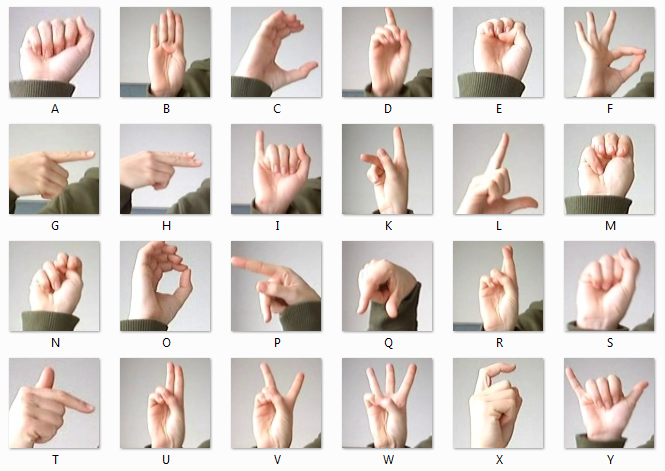

In [9]:
from IPython.display import Image
Image('gdrive/My Drive/FE/Project/Dataset/amer_sign2.png')

###PREPROCESSING

Importing the libraries.

In [10]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

Read the files of the training and testing dataset files.

In [12]:
train = pd.read_csv('gdrive/My Drive/FE/Project/Dataset/sign_mnist_train.csv')
test = pd.read_csv('gdrive/My Drive/FE/Project/Dataset/sign_mnist_test.csv')


Checking the shape of the train and test file.

In [13]:
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


Check the pixels of the train dataset.

In [14]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


For the future preprocessing will convert this data frames into arrays.

In [67]:
# Creating the training and testing arrays
train_set = np.array(train, dtype = 'float32')
test_set = np.array(test, dtype='float32')

In [16]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

(-0.5, 27.5, 27.5, -0.5)

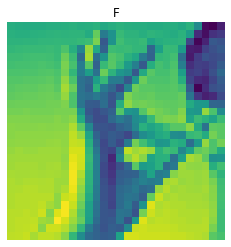

In [17]:
#Check a random image for class label verification
i = random.randint(1,27455)
plt.imshow(train_set[i,1:].reshape((28,28))) 
plt.imshow(train_set[i,1:].reshape((28,28))) 
label_index = train["label"][i]
plt.title(f"{class_names[label_index]}")
plt.axis('off')

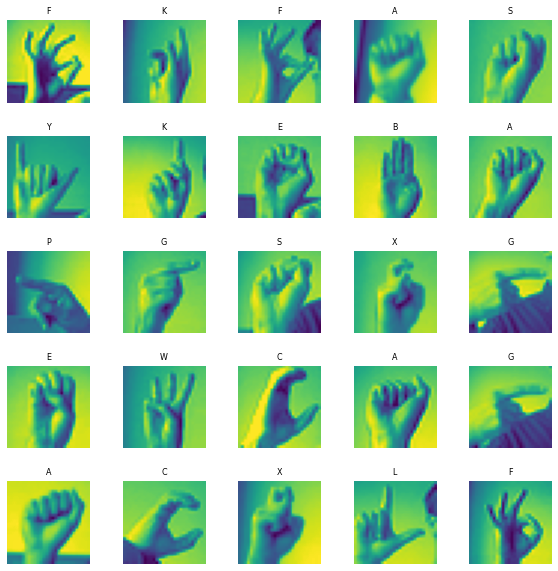

In [18]:
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_set) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_set[index,1:].reshape((28,28)) )
    label_index = int(train_set[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

Prepare the training dataset.

In [68]:
X_train = train_set[:, 1:] / 255
y_train = train_set[:, 0]


Prepare the testing dataset 

In [19]:
X_test = test_set[:, 1:] / 255
y_test = test_set[:,0]

###Visualization

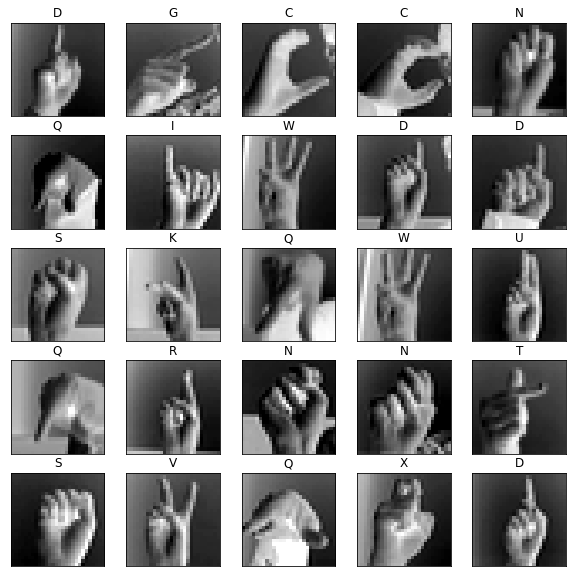

In [22]:
#Visualize train images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()


###Splitting

In [23]:
#Split the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [24]:
print(X_train.shape)
print(y_train.shape)


(21964, 784)
(21964,)


In [25]:
# Unpack the training and test tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(21964, 28, 28, 1)
(21964,)
(5491, 28, 28, 1)


###Convolution Neural Netwrok (CNN)

In [26]:
#Libraries for CNN Model
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [27]:
#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 25, activation = 'softmax'))


In [28]:
#CNN Model Summary
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [29]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

###TRAIN CNN

In [30]:
#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 50, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/50
43/43 [==============================] - 23s 515ms/step - loss: 3.1782 - accuracy: 0.0522 - val_loss: 3.1197 - val_accuracy: 0.1464
Epoch 2/50
43/43 [==============================] - 23s 533ms/step - loss: 2.7187 - accuracy: 0.1713 - val_loss: 2.1316 - val_accuracy: 0.3580
Epoch 3/50
43/43 [==============================] - 22s 520ms/step - loss: 1.8991 - accuracy: 0.3713 - val_loss: 1.4219 - val_accuracy: 0.5698
Epoch 4/50
43/43 [==============================] - 22s 518ms/step - loss: 1.3714 - accuracy: 0.5341 - val_loss: 1.0012 - val_accuracy: 0.6979
Epoch 5/50
43/43 [==============================] - 24s 562ms/step - loss: 1.0772 - accuracy: 0.6295 - val_loss: 0.7300 - val_accuracy: 0.7880
Epoch 6/50
43/43 [==============================] - 22s 515ms/step - loss: 0.8752 - accuracy: 0.6994 - val_loss: 0.5261 - val_accuracy: 0.8499
Epoch 7/50
43/43 [==============================] - 22s 516ms/step - loss: 0.7183 - accuracy: 0.7495 - val_loss: 0.4137 - val_accuracy: 0.8824

Text(0.5, 1.0, 'Accuracy evolution')

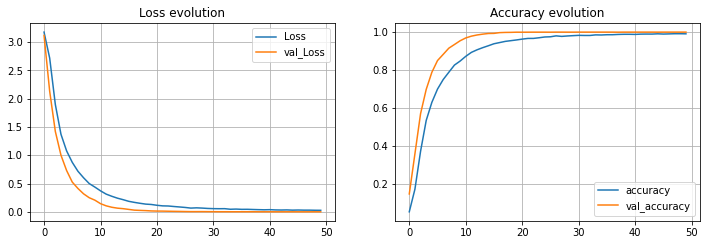

In [31]:
#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

###PREDICTION

In [40]:
#Predictions for the test data
predict_x=cnn_model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

225/225 [==============================] - 3s 14ms/step


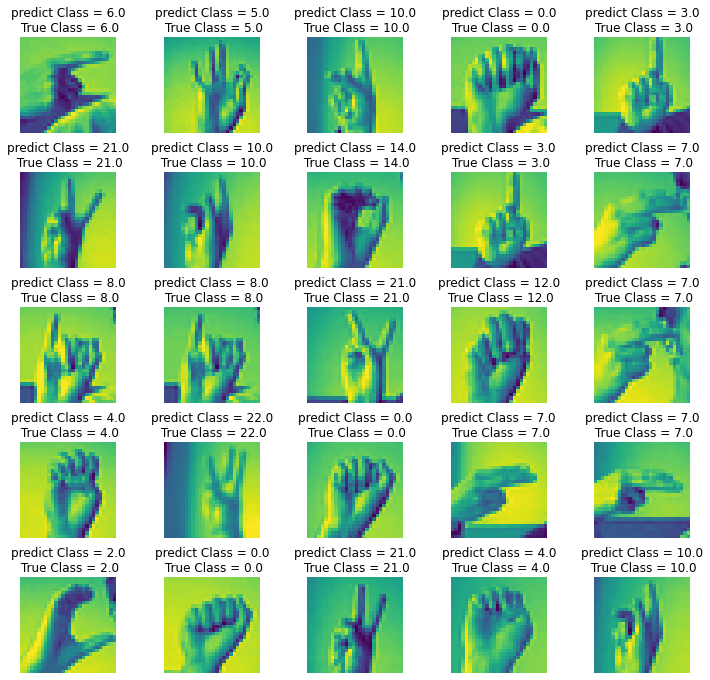

In [41]:
#Visualize predictions
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"predict Class = {classes_x[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, classes_x)

In [45]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

# Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

# Visualizing
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)


In [46]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

###CONFUSION MATRIX

Confusion matrix, without normalization


<Figure size 1440x1440 with 0 Axes>

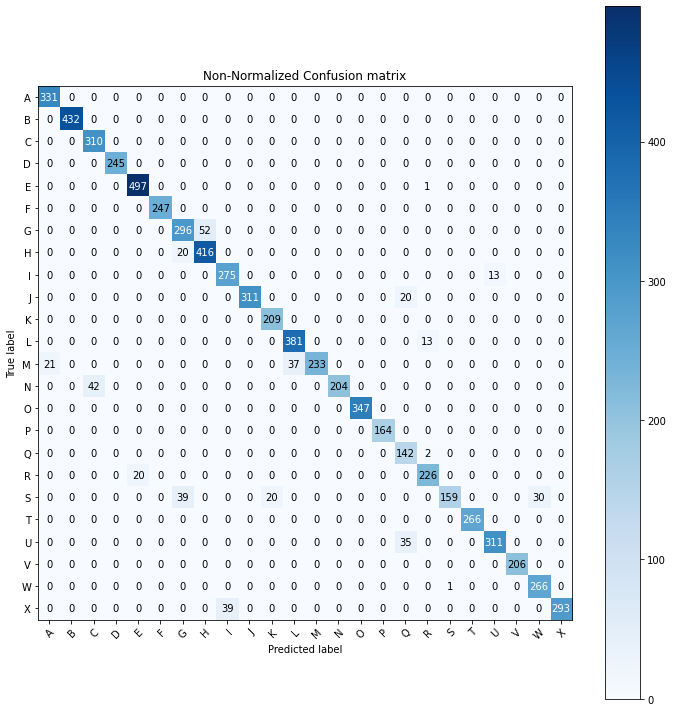

In [48]:
#Non-Normalized Confusion Matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(y_test, classes_x, classes = class_names, title='Non-Normalized Confusion matrix')
plt.show()

Normalized confusion matrix


<Figure size 2520x2520 with 0 Axes>

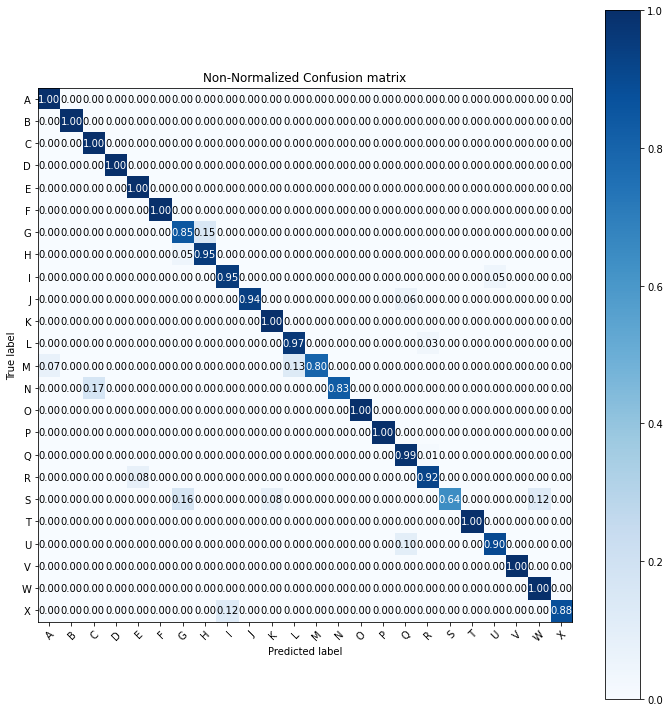

In [49]:
#Normalized Confusion Matrix
plt.figure(figsize=(35,35))
plot_confusion_matrix(y_test, classes_x, classes = class_names, normalize=True, title='Non-Normalized Confusion matrix')
plt.show()

###ACCURACY

In [51]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, classes_x)
print('Accuracy Score = ',acc_score)

Accuracy Score =  0.9435303959843837


###Using Canny Edge Detection 

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

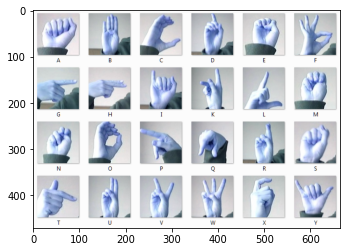

In [64]:
# read the image
image = cv2.imread("gdrive/My Drive/FE/Project/Dataset/amer_sign2.png")
plt.imshow(image)

In [61]:
# convert it to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

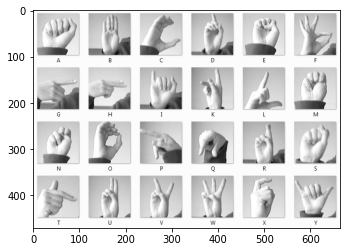

In [62]:
# show the grayscale image
plt.imshow(gray, cmap="gray")
plt.show()

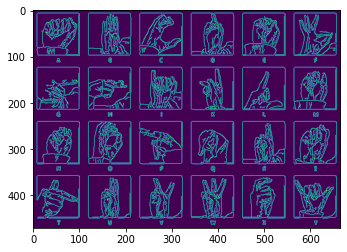

In [66]:
# perform the canny edge detector to detect image edges
edges = cv2.Canny(gray, threshold1=30, threshold2=100)
plt.imshow(edges)